# Task - Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

# importing all python libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step - 1: Load the data


In [63]:
df=pd.read_csv('churn.csv')

In [64]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.drop(columns="customerID",axis=0,inplace = True)

In [5]:
df.info()# it will return the entire data set infromation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.shape

(7043, 20)

In [7]:
df.isnull().sum() # it will checks the is null values in the data frame 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
- For regression task - Mean Absolute Error
- For classification task - Accuracy


# Identify the input and output/target variables.

In [8]:
y=df['Churn']
x=df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

# Identify the type of ML Task.

# Identify the Evaluation Metric

In [9]:
# spatarate not null data
df= df[df["TotalCharges"].notna()]

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df["TotalCharges"].replace(" ",np.NaN,inplace=True)

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75,random_state = 100)

In [17]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.4
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.4
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.2
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [18]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.1
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.2
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [19]:
y_train.head()

6630     No
7013     No
2224    Yes
6580     No
1501     No
Name: Churn, dtype: object

In [20]:
y_test.head()

4880    No
1541    No
1289    No
5745    No
4873    No
Name: Churn, dtype: object

In [21]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


# separating catogorical and numarical columns

In [22]:
x_train_cat = x_train.select_dtypes(include=["object"])
x_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
6630,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1218.25
7013,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),3756.4
2224,Male,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1233.4
6580,Female,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),3824.2
1501,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,243.65


In [23]:
x_train_num = x_train.select_dtypes(include=["int64","float64"])
x_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges
6630,1,16,78.75
7013,0,40,93.40
2224,1,17,76.45
6580,0,49,78.00
1501,0,13,19.95


# Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [24]:
# encodeing oridinal columns
x_train_cat_le = pd.DataFrame(index=x_train_cat.index)
x_train_cat_le.head()

""
6630
7013
2224
6580
1501


In [25]:
# Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for col in x_train_cat:
    x_train_cat_le[col] = label_encoder.fit_transform(x_train_cat[col])
    


In [26]:
x_train_cat_le.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
6630,1,0,0,1,0,1,0,0,0,0,0,2,0,1,2,293
7013,0,0,0,1,2,1,0,2,2,0,2,0,0,1,0,2452
2224,1,1,0,1,0,1,0,2,0,0,0,0,0,1,2,314
6580,0,1,1,1,0,0,0,2,2,0,2,2,1,0,1,2489
1501,1,0,0,1,0,2,1,1,1,1,1,1,2,0,3,1579


# scaling on numerical data

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

    
x_train_num_rescaled = pd.DataFrame(scalar.fit_transform(x_train_num),
                                    columns=x_train_num.columns,
                                    index = x_train_num.index)

In [28]:
x_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges
6630,2.289869,-0.669552,0.471732
7013,-0.436706,0.305416,0.957819
2224,2.289869,-0.628928,0.395418
6580,-0.436706,0.671028,0.446847
1501,-0.436706,-0.791422,-1.479251


# concatinating encoding catogorical lable data and numerical data

In [29]:
x_train_transformed = pd.concat([x_train_cat_le,x_train_num_rescaled],axis = 1)

In [30]:
x_train_transformed.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
6630,1,0,0,1,0,1,0,0,0,0,0,2,0,1,2,293,2.289869,-0.669552,0.471732
7013,0,0,0,1,2,1,0,2,2,0,2,0,0,1,0,2452,-0.436706,0.305416,0.957819
2224,1,1,0,1,0,1,0,2,0,0,0,0,0,1,2,314,2.289869,-0.628928,0.395418
6580,0,1,1,1,0,0,0,2,2,0,2,2,1,0,1,2489,-0.436706,0.671028,0.446847
1501,1,0,0,1,0,2,1,1,1,1,1,1,2,0,3,1579,-0.436706,-0.791422,-1.479251


# Preparing test data

In [31]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.1
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.2
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [32]:
x_test_cat = x_test.select_dtypes(include=["object"])
x_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
4880,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,1067.65
1541,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),1434.1
1289,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),4111.35
5745,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,1445.2
4873,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,144.95


In [33]:
x_test_num = x_test.select_dtypes(include=["int64","float64"])
x_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges
4880,0,50,20.55
1541,0,72,19.85
1289,0,63,68.80
5745,0,61,24.20
4873,0,7,19.30


In [34]:
x_test_cat_le = pd.DataFrame(index=x_test_cat.index)
x_test_cat_le.head()

""
4880
1541
1289
5745
4873


In [35]:
x_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
6630,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1218.25
7013,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),3756.4
2224,Male,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1233.4
6580,Female,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),3824.2
1501,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,243.65


In [36]:
# Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


for col in x_train_cat:
    x_train_cat_le[col] = label_encoder.fit_transform(x_train_cat[col])
    x_test_cat_le[col] = label_encoder.fit_transform(x_test_cat[col])   



In [37]:
x_test_cat_le

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
4880,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,37
1541,1,0,0,1,0,2,1,1,1,1,1,1,2,0,0,210
1289,1,0,0,1,2,0,2,2,2,2,0,0,1,0,0,919
5745,0,1,1,1,2,2,1,1,1,1,1,1,2,1,3,222
4873,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,1,1,1,1,2,1,0,0,0,2,2,2,1,1,2,391
571,1,0,0,1,2,0,0,2,0,2,0,0,2,0,0,640
6368,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,361
25,0,0,0,1,0,0,2,2,0,0,0,0,0,1,0,257


In [38]:
x_test_num_rescaled = pd.DataFrame(scalar.transform(x_test_num),
                                    columns=x_test_num.columns,
                                    index = x_test_num.index)

In [39]:
x_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges
4880,-0.436706,0.711652,-1.459343
1541,-0.436706,1.605372,-1.482569
1289,-0.436706,1.239759,0.141591
5745,-0.436706,1.158512,-1.338236
4873,-0.436706,-1.035164,-1.500818


# concate data

In [40]:
x_test_transformed = pd.concat([x_test_cat_le,x_test_num_rescaled],axis=1)
x_test_transformed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
4880,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,37,-0.436706,0.711652,-1.459343
1541,1,0,0,1,0,2,1,1,1,1,1,1,2,0,0,210,-0.436706,1.605372,-1.482569
1289,1,0,0,1,2,0,2,2,2,2,0,0,1,0,0,919,-0.436706,1.239759,0.141591
5745,0,1,1,1,2,2,1,1,1,1,1,1,2,1,3,222,-0.436706,1.158512,-1.338236
4873,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3,216,-0.436706,-1.035164,-1.500818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,1,1,1,1,2,1,0,0,0,2,2,2,1,1,2,391,-0.436706,-0.547681,1.208328
571,1,0,0,1,2,0,0,2,0,2,0,0,2,0,0,640,2.289869,0.589781,-0.163665
6368,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,361,2.289869,-1.238282,0.977727
25,0,0,0,1,0,0,2,2,0,0,0,0,0,1,0,257,-0.436706,-0.100821,-0.306339


# Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest


# logistic reg

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train)

LogisticRegression()

In [42]:
y_test_pred = classifier.predict(x_test_transformed)

In [43]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [44]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

0.78137421919364


# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [46]:
y_test_pred = classifier.predict(x_test_transformed)

In [47]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [48]:
print(accuracy_score(y_test,y_test_pred))

0.6893810335036911


# DT

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [50]:
y_test_pred = classifier.predict(x_test_transformed)

In [51]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [52]:
print(accuracy_score(y_test,y_test_pred))

0.6802952867688813


# RF

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_transformed, y_train)

RandomForestClassifier()

In [54]:
y_test_pred = classifier.predict(x_test_transformed)

In [55]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [56]:
print(accuracy_score(y_test,y_test_pred))

0.7734241908006815


# Step - 7: Predict and evaluate each model separately using the correct evaluation metric.

In [65]:
prdt={"model":['logistic','KNN','DT','RF'],"accurancy":[0.7935153583617748,0.7417519908987485,0.7195676905574516,0.7821387940841866]}

In [71]:
prd= {"Logistic":0.7935153583617748,
     "KNN":0.7417519908987485,
     "DT":0.7195676905574516,
     "RF":0.7821387940841866}

In [72]:
prdt = pd.DataFrame(prd,index=range(1))

In [73]:
prdt.rename_axis()

,Logistic,KNN,DT,RF
0,0.793515,0.741752,0.719568,0.782139


In [77]:
accurancy_scores = [["Logistic Regression",0.7935153583617748],["KNN Classifier",0.7417519908987485],["Decision Tree Classifier",0.7263936291240045],["Random Forest",0.7832764505119454],["Support Vector Classifier",0.7849829351535836]]                                                         

In [78]:
accurancy = pd.DataFrame(accurancy_scores,columns=["Classifier","Prediction"])
accurancy

,Classifier,Prediction
0,Logistic Regression,0.793515
1,KNN Classifier,0.741752
2,Decision Tree Classifier,0.726394
3,Random Forest,0.783276
4,Support Vector Classifier,0.784983


# Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved

<AxesSubplot:xlabel='Classifier', ylabel='Prediction'>

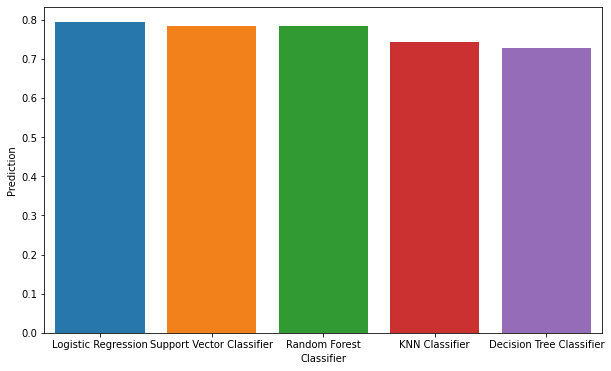

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Classifier",y="Prediction",data=accurancy,saturation=0.89,
        
            order=["Logistic Regression","Support Vector Classifier","Random Forest","KNN Classifier","Decision Tree Classifier"])

<AxesSubplot:xlabel='Classifier', ylabel='Prediction'>

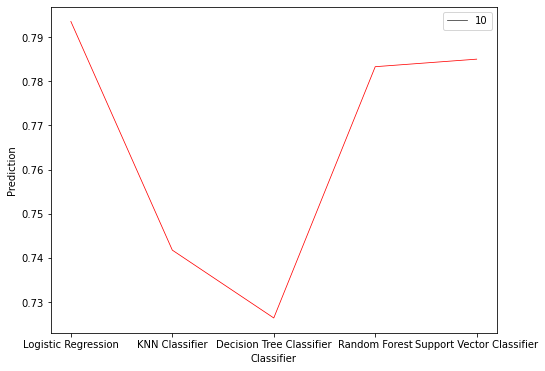

In [80]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Classifier",y = "Prediction",data= accurancy,markers=True,size = 10,color = "r",err_style="bars")